<a href="https://colab.research.google.com/github/gkambasta/ML-Projects/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Additional Notebook: Decision Tree (Ungraded)

#### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder  #will be used for categorical variables, if any
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import pydotplus

#### Downloading Data

In [3]:
#@title Download dataset
!wget https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/iris.csv

--2023-10-02 08:07:11--  https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/iris.csv
Resolving cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)... 172.105.52.210
Connecting to cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4610 (4.5K) [application/octet-stream]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.50K  --.-KB/s    in 0s      

2023-10-02 08:07:12 (762 MB/s) - ‘iris.csv’ saved [4610/4610]



In [4]:
data=pd.read_csv('iris.csv')
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
X = data.iloc[:,:4].values
Y = data['Name'].values

''' iLoc ----  It works by selecting rows and columns by their integer positions,
rather than by their names. The syntax of the iloc function
 includes arguments for row start, row end, column start, and column end'''

' iLoc ----  It works by selecting rows and columns by their integer positions, \nrather than by their names. The syntax of the iloc function\n includes arguments for row start, row end, column start, and column end'

In [10]:
X.shape, Y.shape

((150, 4), (150,))

#### Encoding the categorical label

In [13]:
enc = LabelEncoder()
## for example encoding y
label_encoder = enc.fit(Y)
y = label_encoder.transform(Y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
enc.inverse_transform(y) # Again inversing the encoding

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

##### Displaying the classes and their equivalent encoded values

In [15]:
print ("Categorical classes:", label_encoder.classes_)
integer_classes = label_encoder.transform(label_encoder.classes_)
print ("Integer classes:", integer_classes)

Categorical classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Integer classes: [0 1 2]


### Training a  Classifier

* Iterating the depth ranging from 1 to 4
* Performing decision tree classifier with each depth displaying the graph

#### Training and plotting the tree with Depth=1

In [16]:
# Training and testing set ratio is 67 : 33
X_train, X_test,y_train,y_test = train_test_split(X,Y, test_size=0.33,random_state=42)

##### Training

In [17]:
clf = DecisionTreeClassifier(max_depth =1,criterion='entropy')
# Fitting the data
clf.fit(X_train,y_train)
# Predicting on test set
print("prediction of test set : \n",clf.predict(X_test))
# accuracy on test set
print("Accuracy score on test set : ",clf.score(X_test,y_test))

prediction of test set : 
 ['Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor']
Accuracy score on test set :  0.68


In [ ]:
data.columns.values

array(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'],
      dtype=object)

##### Plotting the tree

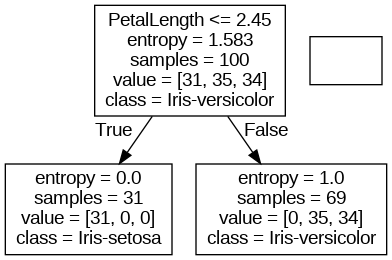

In [18]:
feature_names=data.columns.values[:4]
target_names=np.array(['Iris-setosa','Iris-versicolor','Iris-virginica'])
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, feature_names=feature_names,  class_names=target_names)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())

#### Training and plotting the tree with Depth=2

##### Training

In [19]:
clf = DecisionTreeClassifier(max_depth =2,criterion='entropy',min_samples_split=2)
# Fitting the data
clf.fit(X_train,y_train)
# Predicting on test set
print("prediction of test set : \n",clf.predict(X_test))
# accuracy on test set
print("Accuracy score on test set : ",clf.score(X_test,y_test))

prediction of test set : 
 ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica']
Accuracy score on test set :  0.98


##### Plotting the tree

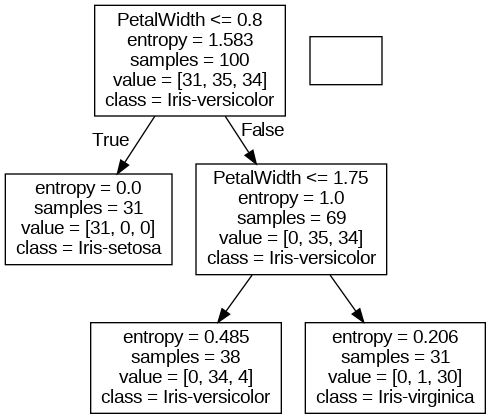

In [20]:
ature_names=data.columns.values[:4]
target_names=np.array(['Iris-setosa','Iris-versicolor','Iris-virginica'])
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, feature_names=feature_names,  class_names=target_names)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())

#### Training and plotting the tree with Depth=3

##### Training

In [21]:
clf = DecisionTreeClassifier(max_depth =3,criterion='entropy')
# Fitting the data
clf.fit(X_train,y_train)
# Predicting on test set
print("prediction of test set : \n",clf.predict(X_test))
# accuracy on test set
print("Accuracy score on test set : ",clf.score(X_test,y_test))

prediction of test set : 
 ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica']
Accuracy score on test set :  0.98


##### Plotting the tree

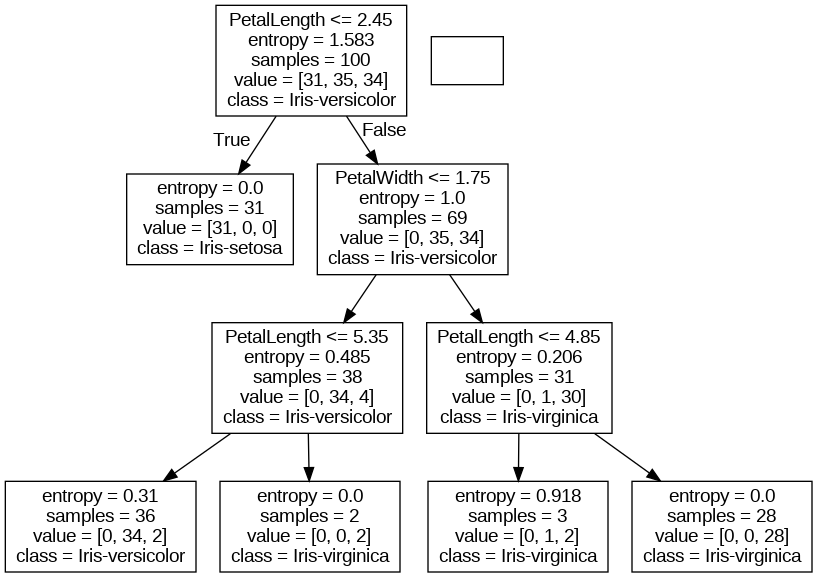

In [22]:
feature_names=data.columns.values[:4]
target_names=np.array(['Iris-setosa','Iris-versicolor','Iris-virginica'])
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, feature_names=feature_names,  class_names=target_names)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())

#### Training and plotting the tree with Depth=5

##### Training

In [23]:
clf = DecisionTreeClassifier(max_depth =5,criterion='entropy')
# Fitting the data
clf.fit(X_train,y_train)
# Predicting on test set
y_pred=clf.predict(X_test)
print("prediction of test set : \n",y_pred)
# accuracy on test set
print("Accuracy score on test set : ",clf.score(X_test,y_test))

prediction of test set : 
 ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica']
Accuracy score on test set :  0.96


##### Plotting the tree

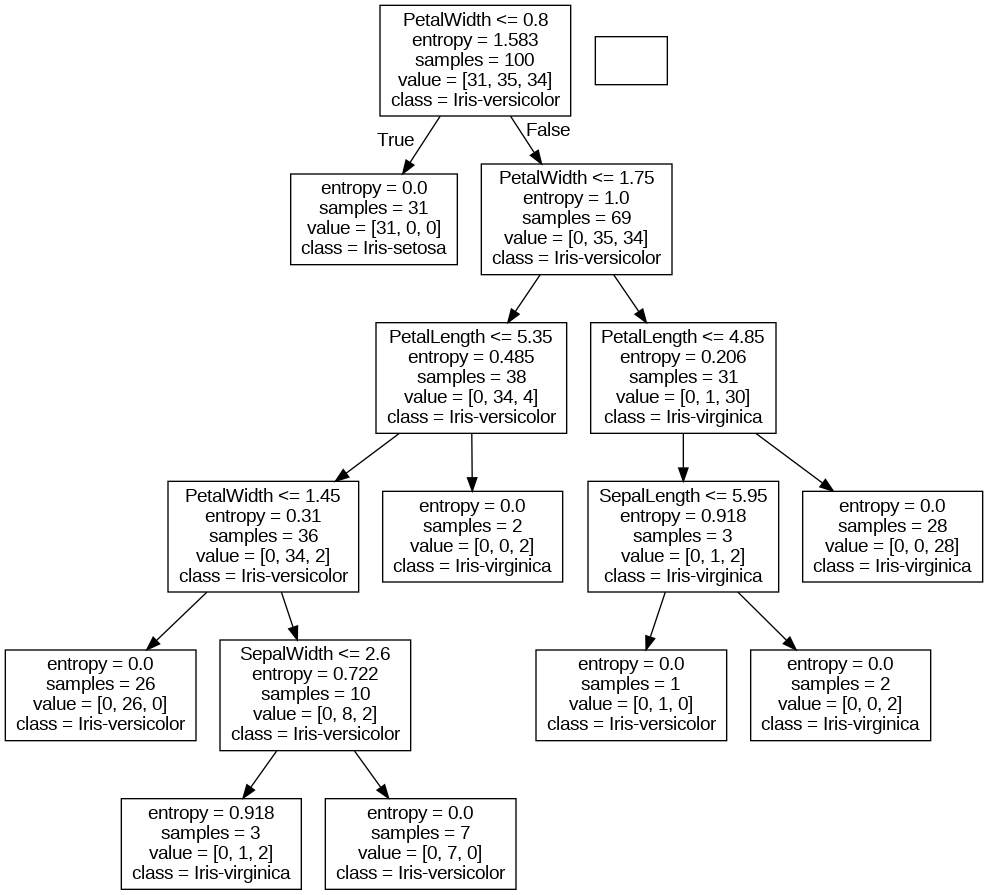

In [24]:
feature_names=data.columns.values[:4]
target_names=np.array(['Iris-setosa','Iris-versicolor','Iris-virginica'])
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, feature_names=feature_names,  class_names=target_names)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())

### Confusion Matrix

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
df=pd.read_csv('iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
df['Name']!='Iris-versicolor'

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Name: Name, Length: 150, dtype: bool

In [28]:
df_b= df.loc[ df['Name']!='Iris-setosa']

In [29]:
X_b = df_b.iloc[:,:4].values
Y_b = df_b['Name'].values

In [30]:
# Training and testing set ratio is 67 : 33
X_train_b, X_test_b,y_train_b,y_test_b = train_test_split(X_b,Y_b, test_size=0.3,random_state=42)

In [31]:
clf = DecisionTreeClassifier(max_depth =1,criterion='entropy')
# Fitting the data
clf.fit(X_train_b,y_train_b)
# Predicting on test set
y_pred_b=clf.predict(X_test_b)
# accuracy on test set
print("Accuracy score on test set : ",clf.score(X_test_b,y_test_b))

Accuracy score on test set :  0.7666666666666667


In [32]:
mat=confusion_matrix(y_test_b, y_pred_b)
mat

array([[16,  1],
       [ 6,  7]])

Text(113.9222222222222, 0.5, 'Predicted Labels')

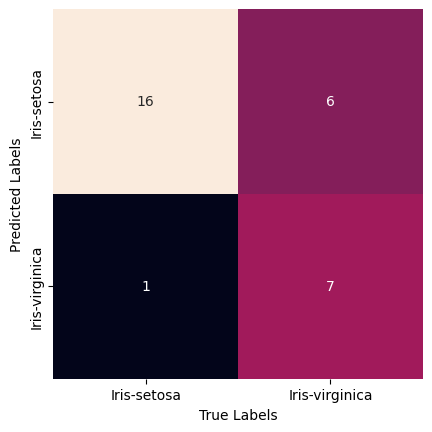

In [33]:
import seaborn as sns
target_names=np.array(['Iris-setosa','Iris-virginica'])
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=target_names,yticklabels=target_names)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')

#### Precision-Recall Metrics

* **Precision:** The precision is calculated as the ratio between the number of Positive samples correctly classified to the total number of samples classified as Positive (either correctly or incorrectly)

    Precision = $\mathbf{\frac{TruePositive}{TruePositive + FalsePositive}}$

* **Recall:** Recall tells us how many true positives (points labelled as positive) were recalled or found by our model.

   Recall = $\mathbf{\frac{TruePositive}{TruePositive + FalseNegative}}$

* **F1-score:** precision and recall can be combined into a single score that seeks to balance both concerns, called the F-score or the F-measure.
  
   F1-score = $\mathbf{\frac{2*Precision*Recall}{Precision+Recall}}$

#### Precision

In [34]:
from sklearn.metrics import precision_score
precision_score(y_test_b, y_pred_b, average="macro")

0.8011363636363636

#### Recall

In [35]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average="macro")

0.9569444444444445

####F1-score

In [36]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="macro")

0.9569444444444445